# Exploratory data analysis
Here we'll look at the preprocessed word association data (which is corrected for standardized American English spelling, etc.) contained in the `SWOW-EN.R100.csv` file.


These are the columns associated with the data (quoted from the SWOW GitHub repository: https://github.com/SimonDeDeyne/SWOWEN-2018).

- `participantID`: unique identifier for the participant
- `created_at`: time and date of participation
- `age`: age of the participant
- `nativeLanguage`: native language from a short list of common languages
- `gender`: gender of the participant (Female / Male / X)
- `education`: Highest level of education: 1 = None, 2 = Elementary school, 3 = High School, 4 = College or University Bachelor, 5 = College or University Master
- `city`: city (city location when tested, might be an approximation)
- `country`: country (country location when tested)
- `cue`: cue word
- `R1`: corrected primary associative response
- `R2`: corrected secondary associative response
- `R3`: corrected tertiary associative response

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_rows', 10) # Sets the max number of rows to print

df = pd.read_csv('data/SWOW-EN.R100.csv', index_col = 0) # Reads in a CSV file
df

/home/ansonl/.local/lib/python3.5/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,id,participantID,age,gender,nativeLanguage,country,education,created_at,cue,R1,R2,R3
1,29,3,33,Fe,United States,Australia,NaN,2011-08-12 02:19:38,although,nevertheless,yet,but
2,30,3,33,Fe,United States,Australia,NaN,2011-08-12 02:19:38,deal,no,cards,shake
3,31,3,33,Fe,United States,Australia,NaN,2011-08-12 02:19:38,music,notes,band,rhythm
4,32,3,33,Fe,United States,Australia,NaN,2011-08-12 02:19:38,inform,tell,rat on,NaN
5,33,3,33,Fe,United States,Australia,NaN,2011-08-12 02:19:38,way,path,via,method
...,...,...,...,...,...,...,...,...,...,...,...,...
1228196,1530300,132506,29,Ma,Canada,Australia,5.0,2018-08-10 01:56:27,strange,mask,weird,stranger
1228197,1530290,132506,29,Ma,Canada,Australia,5.0,2018-08-10 01:56:27,sunset,sea,sky,clause
1228198,1530291,132506,29,Ma,Canada,Australia,5.0,2018-08-10 01:56:27,useless,pitty,worthless,worth
1228199,1530284,132506,29,Ma,Canada,Australia,5.0,2018-08-10 01:56:27,volume,loud,music,key


The study collects some basic demographic data for all of the participants, so we'll plot and visualize some of them here. Note that each row corresponds to a particular word association grouping for a particular user, we need to filter this to get the set of unique users first.

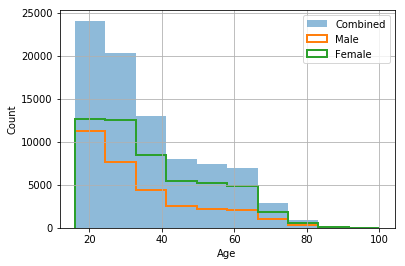

In [3]:
# Gets all the unique participant IDs for the demographics data
demographics = df[['participantID','age','gender','nativeLanguage','country','education']]
demographics = demographics.drop_duplicates(['participantID'])

# Histogram for gender and age
male = demographics[demographics.gender=='Ma']
female = demographics[demographics.gender=='Fe']

plt.hist(demographics['age'],alpha = 0.5, label = 'Combined')
plt.hist(male['age'],histtype = 'step',linewidth=2, label = 'Male')
plt.hist(female['age'],histtype = 'step',linewidth=2, label = 'Female')
plt.grid(True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(loc=1)

In [12]:
demographics['nativeLanguage'].value_counts(normalize=True)

United States       0.512103
United Kingdom      0.128840
Canada              0.108259
Australia           0.052013
Other_Foreign       0.032791
                      ...   
Ghana               0.000048
Tanzania            0.000012
Papua New Guinea    0.000012
Cameroon            0.000012
Mauritius           0.000012
Name: nativeLanguage, Length: 59, dtype: float64

In [11]:
demographics['country'].value_counts(normalize=True)

United States     0.540663
United Kingdom    0.126974
Canada            0.076895
Australia         0.058088
Germany           0.015468
                    ...   
Perú              0.000012
比利时               0.000012
Reino Unido       0.000012
Andorra           0.000012
Eesti             0.000012
Name: country, Length: 306, dtype: float64

In [14]:
demographics['education'].value_counts(normalize=True)

4.0    0.440544
5.0    0.375242
3.0    0.177402
2.0    0.005892
1.0    0.000921
Name: education, dtype: float64

Looks like the majority of the participants are native English speakers living in the US, UK, and Canada, and the overwhelming majority are at least college-educated. Now let's have a look at the word association data by itself.

In [21]:
df['cue'].value_counts(normalize=True)

loosen       0.000081
comet        0.000081
drain        0.000081
ticket       0.000081
ownership    0.000081
               ...   
balloons     0.000081
cease        0.000081
reimburse    0.000081
several      0.000081
wobble       0.000081
Name: cue, Length: 12281, dtype: float64

In [20]:
words = df[['cue','R1','R2','R3']]
words.groupby('cue').nunique()

,cue,R1,R2,R3
cue,,,,
Abel,1,23,35,36
Aboriginal,1,27,55,63
Adam,1,14,39,49
Advil,1,22,33,46
Africa,1,47,64,69
...,...,...,...,...
zombies,1,46,60,59
zone,1,44,63,52
zoo,1,29,57,64
